### Financial Engineering 1: Hedging Assignment

In [261]:
# imports
import numpy as np
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import matplotlib.pyplot as plt

from pyfinance.options import BSM

from scipy.stats import norm

In [262]:
# import data and print head to get rough idea of what is contained
data = pd.read_csv('./fe2.csv')
data.head()

,Unnamed: 0,Date,Underlying,C250,C255,C260,C265,C270,C275,C280,...,P400,P405,P410,P415,P420,P425,P430,P435,P440,P445
0,0,2023-08-21,321.88,77.91,NaN,67.65,NaN,55.00,54.39,49.6,...,77.97,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2023-08-22,322.46,77.60,NaN,69.55,NaN,NaN,54.27,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2023-08-23,327.00,NaN,NaN,73.20,NaN,NaN,59.00,54.3,...,71.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2023-08-24,319.97,NaN,NaN,66.20,NaN,57.77,60.60,50.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2023-08-25,322.98,NaN,73.85,64.93,62.29,NaN,NaN,50.3,...,NaN,NaN,NaN,94.03,NaN,NaN,NaN,NaN,NaN,NaN


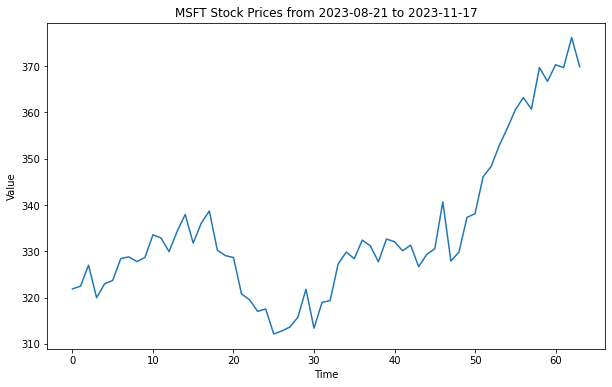

In [263]:
# display underlying stock prices in a chart
fig = plt.figure(figsize=(10,6))
plt.plot(data.index, data['Underlying'])
plt.title(f'MSFT Stock Prices from {data["Date"].min()} to {data["Date"].max()}')
plt.xlabel('Time')
plt.ylabel('Value')
plt.show()

In [264]:
# DataFrame with only Call options 

data_call = data[['Date', 'Underlying'] + [col for col in data.columns if col.startswith('C')]]
print(data_call)

          Date  Underlying    C250    C255    C260    C265    C270   C275  \
0   2023-08-21      321.88   77.91     NaN   67.65     NaN   55.00  54.39   
1   2023-08-22      322.46   77.60     NaN   69.55     NaN     NaN  54.27   
2   2023-08-23      327.00     NaN     NaN   73.20     NaN     NaN  59.00   
3   2023-08-24      319.97     NaN     NaN   66.20     NaN   57.77  60.60   
4   2023-08-25      322.98     NaN   73.85   64.93   62.29     NaN    NaN   
..         ...         ...     ...     ...     ...     ...     ...    ...   
59  2023-11-13      366.68  117.53  112.52  107.66     NaN   97.49  92.95   
60  2023-11-14      370.27  119.10  115.84  110.87  105.93   99.25  94.10   
61  2023-11-15      369.67  119.67  114.38  109.36     NaN     NaN    NaN   
62  2023-11-16      376.17     NaN  120.00  115.46  110.62  106.00    NaN   
63  2023-11-17      369.85  121.95     NaN  112.97     NaN     NaN    NaN   

     C280   C285  ...  C400  C405  C410  C415  C420  C425  C430  C435  C440

In [265]:
# DataFrame with only Put options

data_put = data[['Date', 'Underlying'] + [col for col in data.columns if col.startswith('P')]]
print(data_put)

          Date  Underlying  P250  P255  P260  P265  P270  P275  P280  P285  \
0   2023-08-21      321.88  1.41  1.66  1.95  2.34  2.75  3.35  3.95  4.65   
1   2023-08-22      322.46  1.42   NaN  1.94  2.35  2.87  3.25  3.89  4.90   
2   2023-08-23      327.00  1.21  1.37  1.63  1.95  2.27  2.75  3.24  3.85   
3   2023-08-24      319.97  1.54  1.71  2.15   NaN  2.95  3.65  4.40  5.07   
4   2023-08-25      322.98  1.35  1.81  1.72  2.20  2.40  2.87  3.57  4.10   
..         ...         ...   ...   ...   ...   ...   ...   ...   ...   ...   
59  2023-11-13      366.68  0.01   NaN  0.01  0.01  0.01  0.01  0.01  0.01   
60  2023-11-14      370.27  0.01   NaN  0.01   NaN  0.01  0.01  0.01  0.01   
61  2023-11-15      369.67  0.01   NaN   NaN   NaN  0.01  0.01  0.01  0.01   
62  2023-11-16      376.17   NaN   NaN  0.01   NaN   NaN  0.01  0.01  0.01   
63  2023-11-17      369.85   NaN   NaN  0.01   NaN  0.01  0.01  0.01  0.01   

    ...   P400  P405  P410   P415  P420  P425   P430  P435  P44

In [266]:
# Add T column to call_data (remaining days to maturity)

maturity = pd.to_datetime('2023-11-27')

data_call['T'] = maturity - pd.to_datetime(data_call['Date'])
data_call['T'] = data_call['T'].dt.days

# Add r column (interest rate) - for the moment arbitrary fixed
data_call['r'] = 0.05

data_call.head()

,Date,Underlying,C250,C255,C260,C265,C270,C275,C280,C285,...,C410,C415,C420,C425,C430,C435,C440,C445,T,r
0,2023-08-21,321.88,77.91,NaN,67.65,NaN,55.00,54.39,49.6,NaN,...,0.88,0.73,0.59,0.52,NaN,0.38,0.33,NaN,98,0.05
1,2023-08-22,322.46,77.60,NaN,69.55,NaN,NaN,54.27,NaN,NaN,...,0.94,NaN,0.67,0.60,0.48,NaN,NaN,NaN,97,0.05
2,2023-08-23,327.00,NaN,NaN,73.20,NaN,NaN,59.00,54.3,NaN,...,1.08,0.94,0.78,0.73,0.64,0.55,NaN,0.37,96,0.05
3,2023-08-24,319.97,NaN,NaN,66.20,NaN,57.77,60.60,50.0,44.62,...,0.91,0.71,0.68,NaN,0.48,NaN,0.33,NaN,95,0.05
4,2023-08-25,322.98,NaN,73.85,64.93,62.29,NaN,NaN,50.3,43.80,...,0.83,NaN,NaN,NaN,0.44,0.38,NaN,0.30,94,0.05


In [267]:
# Add T column to put_data (remaining days to maturity)

data_put['T'] = maturity - pd.to_datetime(data_put['Date'])
data_put['T'] = data_put['T'].dt.days

# Add r column (interest rate) - for the moment arbitrary fixed
data_put['r'] = 0.05

data_put.head()

,Date,Underlying,P250,P255,P260,P265,P270,P275,P280,P285,...,P410,P415,P420,P425,P430,P435,P440,P445,T,r
0,2023-08-21,321.88,1.41,1.66,1.95,2.34,2.75,3.35,3.95,4.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98,0.05
1,2023-08-22,322.46,1.42,NaN,1.94,2.35,2.87,3.25,3.89,4.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97,0.05
2,2023-08-23,327.00,1.21,1.37,1.63,1.95,2.27,2.75,3.24,3.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,0.05
3,2023-08-24,319.97,1.54,1.71,2.15,NaN,2.95,3.65,4.40,5.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95,0.05
4,2023-08-25,322.98,1.35,1.81,1.72,2.20,2.40,2.87,3.57,4.10,...,NaN,94.03,NaN,NaN,NaN,NaN,NaN,NaN,94,0.05


In [268]:
# Strike price should become a variable

# Renaming call option columns to just have a float
columnsC_to_transform = [col for col in data_call.columns if col.startswith('C')]
new_column_namesC = {col: float(col[1:]) for col in columnsC_to_transform}
data_call.rename(columns=new_column_namesC, inplace=True)

data_call.head()

,Date,Underlying,250.0,255.0,260.0,265.0,270.0,275.0,280.0,285.0,...,410.0,415.0,420.0,425.0,430.0,435.0,440.0,445.0,T,r
0,2023-08-21,321.88,77.91,NaN,67.65,NaN,55.00,54.39,49.6,NaN,...,0.88,0.73,0.59,0.52,NaN,0.38,0.33,NaN,98,0.05
1,2023-08-22,322.46,77.60,NaN,69.55,NaN,NaN,54.27,NaN,NaN,...,0.94,NaN,0.67,0.60,0.48,NaN,NaN,NaN,97,0.05
2,2023-08-23,327.00,NaN,NaN,73.20,NaN,NaN,59.00,54.3,NaN,...,1.08,0.94,0.78,0.73,0.64,0.55,NaN,0.37,96,0.05
3,2023-08-24,319.97,NaN,NaN,66.20,NaN,57.77,60.60,50.0,44.62,...,0.91,0.71,0.68,NaN,0.48,NaN,0.33,NaN,95,0.05
4,2023-08-25,322.98,NaN,73.85,64.93,62.29,NaN,NaN,50.3,43.80,...,0.83,NaN,NaN,NaN,0.44,0.38,NaN,0.30,94,0.05


In [269]:
# Renaming put option columns to just have a float
columnsP_to_transform = [col for col in data_put.columns if col.startswith('P')]
new_column_namesP = {col: float(col[1:]) for col in columnsP_to_transform}
data_put.rename(columns=new_column_namesP, inplace=True)

data_put.head()

,Date,Underlying,250.0,255.0,260.0,265.0,270.0,275.0,280.0,285.0,...,410.0,415.0,420.0,425.0,430.0,435.0,440.0,445.0,T,r
0,2023-08-21,321.88,1.41,1.66,1.95,2.34,2.75,3.35,3.95,4.65,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98,0.05
1,2023-08-22,322.46,1.42,NaN,1.94,2.35,2.87,3.25,3.89,4.90,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97,0.05
2,2023-08-23,327.00,1.21,1.37,1.63,1.95,2.27,2.75,3.24,3.85,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96,0.05
3,2023-08-24,319.97,1.54,1.71,2.15,NaN,2.95,3.65,4.40,5.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95,0.05
4,2023-08-25,322.98,1.35,1.81,1.72,2.20,2.40,2.87,3.57,4.10,...,NaN,94.03,NaN,NaN,NaN,NaN,NaN,NaN,94,0.05


In [270]:
# Now we can use melt function so that the strike price becomes a variable
data_call = data_call.melt(id_vars=['Underlying', 'Date', 'T', 'r'], var_name="E").dropna()

# We rename the Call option price to Cobs
data_call.rename({'value':'Cobs'}, axis='columns', inplace=True)

print(data_call)

      Underlying        Date   T     r      E   Cobs
0         321.88  2023-08-21  98  0.05  250.0  77.91
1         322.46  2023-08-22  97  0.05  250.0  77.60
10        333.55  2023-09-05  83  0.05  250.0  86.25
12        329.91  2023-09-07  81  0.05  250.0  84.95
13        334.27  2023-09-08  80  0.05  250.0  89.20
...          ...         ...  ..   ...    ...    ...
2532      332.42  2023-10-11  47  0.05  445.0   0.02
2541      330.53  2023-10-24  34  0.05  445.0   0.01
2547      346.07  2023-11-01  26  0.05  445.0   0.01
2551      360.53  2023-11-07  20  0.05  445.0   0.01
2554      369.67  2023-11-10  17  0.05  445.0   0.01

[2102 rows x 6 columns]


In [271]:
# Melt function for data_put 
data_put = data_put.melt(id_vars=['Underlying', 'Date', 'T', 'r'], var_name="E").dropna()

# We rename the Put option price to Pobs
data_put.rename({'value':'Pobs'}, axis='columns', inplace=True)

print(data_put)

      Underlying        Date   T     r      E    Pobs
0        321.880  2023-08-21  98  0.05  250.0    1.41
1        322.460  2023-08-22  97  0.05  250.0    1.42
2        327.000  2023-08-23  96  0.05  250.0    1.21
3        319.970  2023-08-24  95  0.05  250.0    1.54
4        322.980  2023-08-25  94  0.05  250.0    1.35
...          ...         ...  ..   ...    ...     ...
2483     346.070  2023-11-01  26  0.05  440.0   96.35
2503     328.790  2023-08-30  89  0.05  445.0  116.83
2512     336.060  2023-09-13  75  0.05  445.0  108.54
2515     329.060  2023-09-18  70  0.05  445.0  115.81
2527     318.955  2023-10-04  54  0.05  445.0  126.65

[1660 rows x 6 columns]


In [272]:
# Scaling variables of data_call
data_call['r'] = data_call['r'] / 100
data_call['T'] = data_call['T'] / 252
data_call['Underlying'] = data_call['Underlying'] / 1000
data_call['E'] = data_call['E'] / 1000
data_call['Cobs'] = data_call['Cobs'] / 1000

# Computing volatility for each option price 
data_call['volatility'] = data_call.apply(lambda row:  BSM(kind='call', S0=row['Underlying'], K=row['E'], T= row['T'], r=row['r'], sigma=0.1).implied_vol(value = row['Cobs']), axis = 1)
print(data_call)

C:\Users\ayman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyfinance\options.py:242: RuntimeWarning: divide by zero encountered in scalar divide
  vol = vol + diff / opt.vega()
C:\Users\ayman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyfinance\options.py:149: RuntimeWarning: invalid value encountered in scalar divide
  self.d1 = (
C:\Users\ayman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyfinance\options.py:151: RuntimeWarning: overflow encountered in scalar power
  + (self.r + 0.5 * self.sigma ** 2) * self.T
C:\Users\ayman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyfinance\options.py:242: RuntimeWarning: overflow encountered in scalar divide
  vol = vol + diff / opt.vega(

      Underlying        Date         T       r      E     Cobs  volatility
0        0.32188  2023-08-21  0.388889  0.0005   0.25  0.07791    0.406388
1        0.32246  2023-08-22  0.384921  0.0005   0.25  0.07760    0.388630
10       0.33355  2023-09-05  0.329365  0.0005   0.25  0.08625    0.377792
12       0.32991  2023-09-07  0.321429  0.0005   0.25  0.08495    0.446568
13       0.33427  2023-09-08  0.317460  0.0005   0.25  0.08920    0.459767
...          ...         ...       ...     ...    ...      ...         ...
2532     0.33242  2023-10-11  0.186508  0.0005  0.445  0.00002         NaN
2541     0.33053  2023-10-24  0.134921  0.0005  0.445  0.00001         NaN
2547     0.34607  2023-11-01  0.103175  0.0005  0.445  0.00001         NaN
2551     0.36053  2023-11-07  0.079365  0.0005  0.445  0.00001         NaN
2554     0.36967  2023-11-10  0.067460  0.0005  0.445  0.00001         NaN

[2102 rows x 7 columns]


In [273]:
# Scaling variables of data_put
data_put['r'] = data_put['r'] / 100
data_put['T'] = data_put['T'] / 252
data_put['Underlying'] = data_put['Underlying'] / 1000
data_put['E'] = data_put['E'] / 1000
data_put['Pobs'] = data_put['Pobs'] / 1000

# Computing volatility for each option price 
data_put['volatility'] = data_put.apply(lambda row:  BSM(kind='put', S0=row['Underlying'], K=row['E'], T= row['T'], r=row['r'], sigma=0.1).implied_vol(value = row['Pobs']), axis = 1)
print(data_put)

C:\Users\ayman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyfinance\options.py:242: RuntimeWarning: divide by zero encountered in scalar divide
  vol = vol + diff / opt.vega()
C:\Users\ayman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyfinance\options.py:149: RuntimeWarning: invalid value encountered in scalar divide
  self.d1 = (
C:\Users\ayman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyfinance\options.py:151: RuntimeWarning: overflow encountered in scalar power
  + (self.r + 0.5 * self.sigma ** 2) * self.T
C:\Users\ayman\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\pyfinance\options.py:242: RuntimeWarning: overflow encountered in scalar divide
  vol = vol + diff / opt.vega(

      Underlying        Date         T       r      E     Pobs  volatility
0       0.321880  2023-08-21  0.388889  0.0005   0.25  0.00141         NaN
1       0.322460  2023-08-22  0.384921  0.0005   0.25  0.00142         NaN
2       0.327000  2023-08-23  0.380952  0.0005   0.25  0.00121         NaN
3       0.319970  2023-08-24  0.376984  0.0005   0.25  0.00154         NaN
4       0.322980  2023-08-25  0.373016  0.0005   0.25  0.00135         NaN
...          ...         ...       ...     ...    ...      ...         ...
2483    0.346070  2023-11-01  0.103175  0.0005   0.44  0.09635    0.533641
2503    0.328790  2023-08-30  0.353175  0.0005  0.445  0.11683    0.269691
2512    0.336060  2023-09-13  0.297619  0.0005  0.445  0.10854         NaN
2515    0.329060  2023-09-18  0.277778  0.0005  0.445  0.11581         NaN
2527    0.318955  2023-10-04  0.214286  0.0005  0.445  0.12665    0.371742

[1660 rows x 7 columns]


In [274]:
# Filtering unwanted volatilities for data_call, i.e. volatility smaller than zero and larger than 0.6

data_call = data_call[(data_call['volatility'] < 0.6) & (data_call['volatility'] > 0.0)]
print(data_call)

      Underlying        Date         T       r      E     Cobs  volatility
0        0.32188  2023-08-21  0.388889  0.0005   0.25  0.07791    0.406388
1        0.32246  2023-08-22  0.384921  0.0005   0.25  0.07760    0.388630
10       0.33355  2023-09-05  0.329365  0.0005   0.25  0.08625    0.377792
12       0.32991  2023-09-07  0.321429  0.0005   0.25  0.08495    0.446568
13       0.33427  2023-09-08  0.317460  0.0005   0.25  0.08920    0.459767
...          ...         ...       ...     ...    ...      ...         ...
1659     0.36668  2023-11-13  0.055556  0.0005  0.375  0.00105    0.110818
1660     0.37027  2023-11-14  0.051587  0.0005  0.375  0.00147    0.097984
1661     0.36967  2023-11-15  0.047619  0.0005  0.375  0.00080    0.081888
1662     0.37617  2023-11-16  0.043651  0.0005  0.375  0.00246    0.057960
1726     0.37617  2023-11-16  0.043651  0.0005   0.38  0.00052    0.058077

[1062 rows x 7 columns]


In [275]:
# Filtering unwanted volatilities for data_put, i.e. volatility smaller than zero and larger than 0.6

data_put = data_put[(data_put['volatility'] < 0.6) & (data_put['volatility'] > 0.0)]
print(data_put)

      Underlying        Date         T       r      E     Pobs  volatility
473     0.312140  2023-09-26  0.246032  0.0005  0.285  0.00455    0.240432
474     0.312790  2023-09-27  0.242063  0.0005  0.285  0.00415    0.236239
478     0.313390  2023-10-03  0.218254  0.0005  0.285  0.00412    0.250775
512     0.321880  2023-08-21  0.388889  0.0005   0.29  0.00560    0.223852
513     0.322460  2023-08-22  0.384921  0.0005   0.29  0.00570    0.228854
...          ...         ...       ...     ...    ...      ...         ...
2443    0.332880  2023-09-06  0.325397  0.0005   0.44  0.10841    0.297695
2482    0.338110  2023-10-31  0.107143  0.0005   0.44  0.10375    0.530463
2483    0.346070  2023-11-01  0.103175  0.0005   0.44  0.09635    0.533641
2503    0.328790  2023-08-30  0.353175  0.0005  0.445  0.11683    0.269691
2527    0.318955  2023-10-04  0.214286  0.0005  0.445  0.12665    0.371742

[789 rows x 7 columns]


In [276]:
# Function to calculate Delta (Nd1)
# def calculate_Nd1(row):
#     S, E, r, sigma, T = row['Underlying'], row['E'], row['r'], row['volatility'], row['T']

#     d1 = (np.log(S/E) + (r + sigma ** 2 / 2) * (T)) / (sigma * np.sqrt(T) + 1e-8)  # Adding a small epsilon to avoid division by zero
#     Nd1 = norm.cdf(d1)

#     return Nd1

# Adding new column Delta, Vega and Gamma to data_call
data_call['Delta'] = data_call.apply(lambda row:  BSM(kind='call', S0=row['Underlying'], K=row['E'], T= row['T'], r=row['r'], sigma=row['volatility']).delta(), axis = 1)
data_call['Vega'] = data_call.apply(lambda row:  BSM(kind='call', S0=row['Underlying'], K=row['E'], T= row['T'], r=row['r'], sigma=row['volatility']).vega(), axis = 1)
data_call['Gamma'] = data_call.apply(lambda row:  BSM(kind='call', S0=row['Underlying'], K=row['E'], T= row['T'], r=row['r'], sigma=row['volatility']).gamma(), axis = 1)

# data1['Delta'] = data1.apply(calculate_Nd1, axis=1)
print(data_call)

# To have a complete picture of what is in data_call
data_call.to_csv('data_call.csv', index=False)


      Underlying        Date         T       r      E     Cobs  volatility  \
0        0.32188  2023-08-21  0.388889  0.0005   0.25  0.07791    0.406388   
1        0.32246  2023-08-22  0.384921  0.0005   0.25  0.07760    0.388630   
10       0.33355  2023-09-05  0.329365  0.0005   0.25  0.08625    0.377792   
12       0.32991  2023-09-07  0.321429  0.0005   0.25  0.08495    0.446568   
13       0.33427  2023-09-08  0.317460  0.0005   0.25  0.08920    0.459767   
...          ...         ...       ...     ...    ...      ...         ...   
1659     0.36668  2023-11-13  0.055556  0.0005  0.375  0.00105    0.110818   
1660     0.37027  2023-11-14  0.051587  0.0005  0.375  0.00147    0.097984   
1661     0.36967  2023-11-15  0.047619  0.0005  0.375  0.00080    0.081888   
1662     0.37617  2023-11-16  0.043651  0.0005  0.375  0.00246    0.057960   
1726     0.37617  2023-11-16  0.043651  0.0005   0.38  0.00052    0.058077   

         Delta      Vega      Gamma  
0     0.869638  0.042545 

In [277]:
# Adding new column Delta, Vega and Gamma to data_put
data_put['Delta'] = data_put.apply(lambda row:  BSM(kind='put', S0=row['Underlying'], K=row['E'], T= row['T'], r=row['r'], sigma=row['volatility']).delta(), axis = 1)
data_put['Vega'] = data_put.apply(lambda row:  BSM(kind='put', S0=row['Underlying'], K=row['E'], T= row['T'], r=row['r'], sigma=row['volatility']).vega(), axis = 1)
data_put['Gamma'] = data_put.apply(lambda row:  BSM(kind='put', S0=row['Underlying'], K=row['E'], T= row['T'], r=row['r'], sigma=row['volatility']).gamma(), axis = 1)

# data1['Delta'] = data1.apply(calculate_Nd1, axis=1)
print(data_put)

# To have a complete picture of what is in data_call
data_put.to_csv('data_put.csv', index=False)


      Underlying        Date         T       r      E     Pobs  volatility  \
473     0.312140  2023-09-26  0.246032  0.0005  0.285  0.00455    0.240432   
474     0.312790  2023-09-27  0.242063  0.0005  0.285  0.00415    0.236239   
478     0.313390  2023-10-03  0.218254  0.0005  0.285  0.00412    0.250775   
512     0.321880  2023-08-21  0.388889  0.0005   0.29  0.00560    0.223852   
513     0.322460  2023-08-22  0.384921  0.0005   0.29  0.00570    0.228854   
...          ...         ...       ...     ...    ...      ...         ...   
2443    0.332880  2023-09-06  0.325397  0.0005   0.44  0.10841    0.297695   
2482    0.338110  2023-10-31  0.107143  0.0005   0.44  0.10375    0.530463   
2483    0.346070  2023-11-01  0.103175  0.0005   0.44  0.09635    0.533641   
2503    0.328790  2023-08-30  0.353175  0.0005  0.445  0.11683    0.269691   
2527    0.318955  2023-10-04  0.214286  0.0005  0.445  0.12665    0.371742   

         Delta      Vega     Gamma  
473  -0.205141  0.044008  

In [278]:
# Start date for hedging, 45 days before last data point in dataframe
start_date = pd.to_datetime('2023-11-27') - pd.DateOffset(45)
print(start_date)

# Find the call option price with delta value that is closest to 0.5 on the start date, to get the ATM option
filtered_rows = data_call[pd.to_datetime(data_call['Date']) == start_date]
atm_call = filtered_rows.loc[(filtered_rows['Delta'] - 0.5).abs().idxmin()]
option_price, strike, delta, date = atm_call['Cobs'], atm_call['E'], atm_call['Delta'], atm_call['Date']
print(f"Atm: Call option price with Start date = {date}, Delta = {delta}, Option price = {option_price}, Strike = {strike}")


2023-10-13 00:00:00
Atm: Call option price with Start date = 2023-10-13, Delta = 0.48925161034654463, Option price = 0.01109, Strike = 0.33


In [279]:
portfolio_value = atm_call['Cobs']
portfolio_delta = atm_call['Delta']
print(f'Portfolio Value: {portfolio_value}, Portfolio Delta: {portfolio_delta}')
replicating_portfolio_delta = -1*portfolio_delta
replicating_porfolio_value = replicating_portfolio_delta*data_call[pd.to_datetime(pd.to_datetime(data_call['Date'])) == start_date]['Underlying'].to_numpy()[0]
print(f'Current shares in replicating portfolio: 0')
print(f'Sell {portfolio_delta} shares to hedge portfolio')
print(f'Replicating Portfolio Value: {replicating_porfolio_value}, Replicating Portfolio Delta: {replicating_portfolio_delta}')
print(f'Total Portfolio Value: {portfolio_value + replicating_porfolio_value}, Total Portfolio Delta: {portfolio_delta + replicating_portfolio_delta}')

Portfolio Value: 0.01109, Portfolio Delta: 0.48925161034654463
Current shares in replicating portfolio: 0
Sell 0.48925161034654463 shares to hedge portfolio
Replicating Portfolio Value: -0.16034243025887307, Replicating Portfolio Delta: -0.48925161034654463
Total Portfolio Value: -0.14925243025887308, Total Portfolio Delta: 0.0


In [280]:
next_day = start_date + pd.DateOffset(3)
new_portfolio_value = data_call[(pd.to_datetime(data_call['Date']) == next_day) & (data_call['E'] == atm_call['E'])]['Cobs'].to_numpy()[0]
new_portfolio_delta = data_call[(pd.to_datetime(data_call['Date']) == next_day) & (data_call['E'] == atm_call['E'])]['Delta'].to_numpy()[0]
print(f'Portfolio Value: {new_portfolio_value}, Portfolio Delta: {new_portfolio_delta}')
new_replicating_portfolio_delta = -1*new_portfolio_delta
new_replicating_porfolio_value = new_replicating_portfolio_delta*data_call[pd.to_datetime(pd.to_datetime(data_call['Date'])) == next_day]['Underlying'].to_numpy()[0]
print(f'Current shares in replicating portfolio: {portfolio_value}')
print(f'Sell {new_portfolio_delta - portfolio_value} shares to hedge portfolio')
print(f'Replicating Portfolio Value: {new_replicating_porfolio_value}, Replicating Portfolio Delta: {new_replicating_portfolio_delta}')
print(f'Total Portfolio Value: {new_portfolio_value + new_replicating_porfolio_value}, Total Portfolio Delta: {new_portfolio_delta + new_replicating_portfolio_delta}')

Portfolio Value: 0.013349999999999999, Portfolio Delta: 0.5533673521489916
Current shares in replicating portfolio: 0.01109
Sell 0.5422773521489915 shares to hedge portfolio
Replicating Portfolio Value: -0.18407211601884055, Replicating Portfolio Delta: -0.5533673521489916
Total Portfolio Value: -0.17072211601884055, Total Portfolio Delta: 0.0


In [317]:
def get_option_portfolio_values(portfolio, start_date, end_date, call_options, put_options):
    portfolio_values = []

    for option, quantity, buy_sell in portfolio:
        option_type = option[0]
        option_strike = float(option[1:])

        if(option_type == 'C'):
            options_data = call_options
            option_price_column = 'Cobs'
        else:
            options_data = put_options
            option_price_column = 'Pobs'

        for index, row in options_data[(options_data['Date'] >= start_date) & (options_data['Date'] <= end_date)].iterrows():
            if(row['E'] == (option_strike/1000)):
                if np.isnan(row[option_price_column]):
                    raise ValueError('portfolio contains nan price')
                elif buy_sell == 'buy':
                    portfolio_values.append(row[option_price_column] * quantity)
                else:
                    portfolio_values.append(-row[option_price_column] * quantity)

    return portfolio_values

def get_values(ticker, start_date, end_date, data):
    return data[(data['Date'] >= start_date) & (data['Date'] <= end_date)][ticker].to_numpy()

def get_delta_values(portfolio, start_date, end_date, call_options, put_options):
    delta_values = []

    for option, quantity, buy_sell in portfolio:
        option_type = option[0]
        option_strike = float(option[1:])

        if(option_type == 'C'):
            options_data = call_options
        else:
            options_data = put_options

        for index, row in options_data[(options_data['Date'] >= start_date) & (options_data['Date'] <= end_date)].iterrows():
            if(row['E'] == (option_strike/1000)):
                if np.isnan(row['Delta']):
                    raise ValueError('portfolio contains nan delta value')
                elif buy_sell == 'buy':
                    delta_values.append(row['Delta'] * quantity)
                else:
                    delta_values.append(-row['Delta'] * quantity)

    return np.array(delta_values)

def get_vega_values(portfolio, start_date, end_date, call_options, put_options):
    vega_values = []

    for option, quantity, buy_sell in portfolio:
        option_type = option[0]
        option_strike = float(option[1:])

        if(option_type == 'C'):
            options_data = call_options
        else:
            options_data = put_options

        for index, row in options_data[(options_data['Date'] >= start_date) & (options_data['Date'] <= end_date)].iterrows():
            if(row['E'] == (option_strike/1000)):
                if np.isnan(row['Vega']):
                    raise ValueError('portfolio contains nan vega value')
                elif buy_sell == 'buy':
                    vega_values.append(row['Vega'] * quantity)
                else:
                    vega_values.append(-row['Vega'] * quantity)

    return np.array(vega_values)

def delta_hedge(hedging_frequency, portfolio_values, underlying_values, delta_values):
    if (any(np.isnan(delta_values)) or any(np.isnan(portfolio_values)) or any(np.isnan(underlying_values)) 
            or hedging_frequency <= 0 or hedging_frequency >= len(delta_values)):
        return False
    
    portfolio_value = portfolio_values[0]
    underlying_value = underlying_values[0]
    delta = delta_values[0]
    accuracies = []

    for i in range(hedging_frequency, len(delta_values), hedging_frequency):
        accuracy = (portfolio_values[i] - portfolio_value) - (underlying_values[i] - underlying_value) * delta
        accuracies.append(accuracy)
        portfolio_value = portfolio_values[i]
        underlying_value = underlying_values[i]
        delta = delta_values[i]

    mean_squared_error = sum([num**2 for num in accuracies]) / len(accuracies)

    return {
        'accuracies': accuracies,
        'mean_squered_error': mean_squared_error
    }

def option_portfolio_delta_hedging(portfolio, start_date, end_date, hedging_frequency, all_options, call_options, put_options):
    # portfolio example: [['C250', 2, 'buy'], ['P400', 1, 'sell']]

    portfolio_values = get_option_portfolio_values(portfolio, start_date, end_date, call_options, put_options)
    underlying_values = get_values('Underlying', start_date, end_date, all_options)
    delta_values = get_delta_values(portfolio, start_date, end_date, call_options, put_options)

    hedging_results = delta_hedge(hedging_frequency, portfolio_values, underlying_values, delta_values)
    return hedging_results

def solve_2_by_2_linear_system(equation_one, equation_two):
    # equations of the form ax + by = c, dx + ey = f
    a, b, c = equation_one
    d, e, f = equation_two

    x = (b * f - e * c) / (b * d - a * e)
    y = (c - a * x) / b

    return (x, y)

def delta_vega_hedge(hedging_frequency, portfolio_values, portfolio_delta_values, portfolio_vega_values, sec_one_values, sec_one_delta_values, 
                        sec_one_vega_values, sec_two_values, sec_two_delta_values, sec_two_vega_values):

    portfolio_value = portfolio_values[0]
    portfolio_delta= portfolio_delta_values[0]
    portfolio_vega = portfolio_vega_values[0]
    sec_one = sec_one_values[0]
    sec_one_delta = sec_one_delta_values[0]
    sec_one_vega = sec_one_vega_values[0]
    sec_two = sec_two_values[0]
    sec_two_delta = sec_two_delta_values[0]
    sec_two_vega = sec_two_vega_values[0]
    sec_one_amount, sec_two_amount = solve_2_by_2_linear_system([sec_one_delta, sec_two_delta, -portfolio_delta], 
                                                                    [sec_one_vega, sec_two_vega, -portfolio_vega])
    accuracies = []

    for i in range(hedging_frequency, len(sec_two_delta_values), hedging_frequency):
        change_in_portfolio = portfolio_values[i] - portfolio_value
        change_in_replication = sec_one_amount * (sec_one_values[i] - sec_one) + sec_two_amount * (sec_two_values[i] - sec_two)
        accuracy = change_in_portfolio - change_in_replication
        accuracies.append(accuracy)
        portfolio_value = portfolio_values[i]
        portfolio_delta= portfolio_delta_values[i]
        portfolio_vega = portfolio_vega_values[i]
        sec_one = sec_one_values[i]
        sec_one_delta = sec_one_delta_values[i]
        sec_one_vega = sec_one_vega_values[i]
        sec_two = sec_two_values[i]
        sec_two_delta = sec_two_delta_values[i]
        sec_two_vega = sec_two_vega_values[i]
        sec_one_amount, sec_two_amount = solve_2_by_2_linear_system([sec_one_delta, sec_two_delta, -portfolio_delta], 
                                                                        [sec_one_vega, sec_two_vega, -portfolio_vega])

    mean_squared_error = sum([num**2 for num in accuracies]) / len(accuracies)

    return {
        'accuracies': accuracies,
        'mean_squered_error': mean_squared_error
    }

def option_portfolio_delta_vega_hedging(portfolio, security_one, security_two, start_date, end_date, hedging_frequency, all_options, call_options, put_options):
    # portfolio example: [['C250', 2, 'buy'], ['P400', 1, 'sell']]

    portfolio_values = get_option_portfolio_values(portfolio, start_date, end_date, call_options, put_options)
    portfolio_delta_values = get_delta_values(portfolio, start_date, end_date, call_options, put_options)
    portfolio_vega_values = get_vega_values(portfolio, start_date, end_date, call_options, put_options)
    sec_one_values = get_values(security_one, start_date, end_date, all_options)
    sec_one_delta_values = get_delta_values([[security_one, 1, 'buy']], start_date, end_date, call_options, put_options)
    sec_one_vega_values = get_vega_values([[security_one, 1, 'buy']], start_date, end_date, call_options, put_options)
    sec_two_values = get_values(security_two, start_date, end_date, all_options)
    sec_two_delta_values = get_delta_values([[security_two, 1, 'buy']], start_date, end_date, call_options, put_options)
    sec_two_vega_values = get_vega_values([[security_two, 1, 'buy']], start_date, end_date, call_options, put_options)
    
    hedging_results = delta_vega_hedge(hedging_frequency, portfolio_values, portfolio_delta_values, portfolio_vega_values, sec_one_values, 
                                            sec_one_delta_values, sec_one_vega_values, sec_two_values, sec_two_delta_values, sec_two_vega_values)
    return hedging_results

In [318]:
results = option_portfolio_delta_hedging([['C300', 1, 'buy']], '2023-10-18', '2023-11-17', 1, data, data_call, data_put)
print(results)

{'accuracies': [-0.9880257819427469, 3.8665782363708967, -2.0958781368087074, -0.9803571132142708, -8.449631861056206, 11.406767731354714, -1.617953622950115, -6.838079961400194, -0.7374840713722663, -7.275180623806187, -2.0828459643097235, -4.392286482013276, -3.6137312217183726, -3.7299514738082653, -2.6606175325430206, 2.414049446434913, -8.672374729760673], 'mean_squered_error': 27.31523096939127}
